# Visualization

> ...

In [ ]:
#| default_exp visualization

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| export
from pathlib import Path

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#|eval: false
from lssm.loading import load_ossl

In [ ]:
#| export
def plot_spectra(X, X_names, sample=50, 
                 ascending=True,
                 alpha=0.8, color='#333', 
                 xlabel='Wavenumber',
                 ylabel='Absorbance',
                 title=None,
                 figsize=(20, 4)):
    sns.set_style("whitegrid")
    sns.despine()
    
    plt.figure(figsize=figsize)
    
    if len(X.shape) > 1:
        idx = np.random.randint(X.shape[0], size=sample)
        X = X[idx,:]
    else:
        X = X.reshape(1, -1)
        
    _min, _max = np.min(X_names), np.max(X_names)
    _order = [_min, _max] if ascending else [_max, _min]
    plt.xlim(*_order)
    
    for i in range(X.shape[0]): 
        sns.lineplot(x=X_names, y=X[i,:], lw=1, c=color, alpha=alpha)
    
    plt.locator_params(axis="x", nbins=20)   
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    

Example:

In [ ]:
#|eval: false
analytes = 'k.ext_usda.a725_cmolc.kg'
data = load_ossl(analytes, spectra_type='visnir')
X, y, X_names, smp_idx, ds_name, ds_label = data

Reading & selecting data ...


<Figure size 640x480 with 0 Axes>

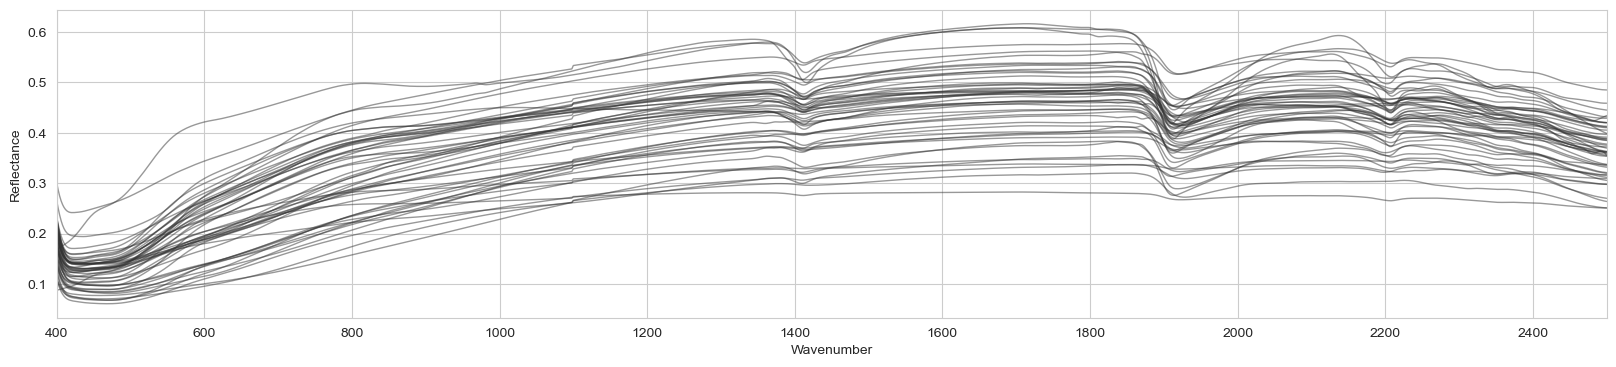

In [ ]:
#|eval: false
plot_spectra(X, X_names, alpha=0.5, ylabel='Reflectance')

If a single spectrum:

<Figure size 640x480 with 0 Axes>

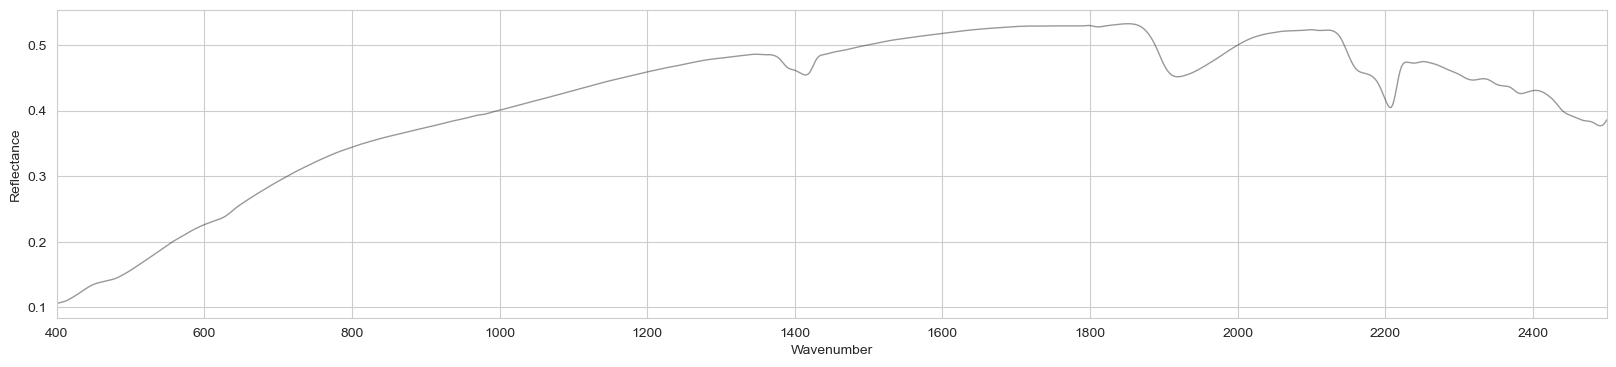

In [ ]:
#|eval: false
plot_spectra(X[0], X_names, alpha=0.5, ylabel='Reflectance', ascending=True)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()